# **DATA LOADING AND CLEANING**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Cleaning ---
print("--- Loading and Cleaning Data ---")
# Load the dataset
# Ensure 'Daily Household Transactions.csv' is in the same directory or provide the full path
df = pd.read_csv('/content/Daily Household Transactions.csv')

# Convert 'Date' column to datetime objects, handling potential errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where date conversion failed
df.dropna(subset=['Date'], inplace=True)

# Clean up whitespace in the 'Category' column
df['Category'] = df['Category'].str.strip()

print("\n--- Data Info ---")
df.info()

print("\n--- Data Head ---")
print(df.head())

--- Loading and Cleaning Data ---

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 2420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            1303 non-null   object        
 2   Category        1303 non-null   object        
 3   Subcategory     1041 non-null   object        
 4   Note            1162 non-null   object        
 5   Amount          1303 non-null   float64       
 6   Income/Expense  1303 non-null   object        
 7   Currency        1303 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 91.6+ KB

--- Data Head ---
                 Date                   Mode        Category  \
0 2018-09-20 12:04:08                   Cash  Transportation   
1 2018-09-20 12:03:15                   Cash            Food   
3 2018-09-17 23:41:17  Saving Bank account 

/tmp/ipython-input-2090704413.py:12: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# **Exploratory Data Analysis (EDA)**

In [9]:
# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- Performing Exploratory Data Analysis ---")
# Set plot style and size
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Separate Income and Expense transactions for analysis
df_expense = df[df['Income/Expense'] == 'Expense'].copy()


--- Performing Exploratory Data Analysis ---


# **TOP 10 EXPENSE CATEGORIES**

/tmp/ipython-input-2197227962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')


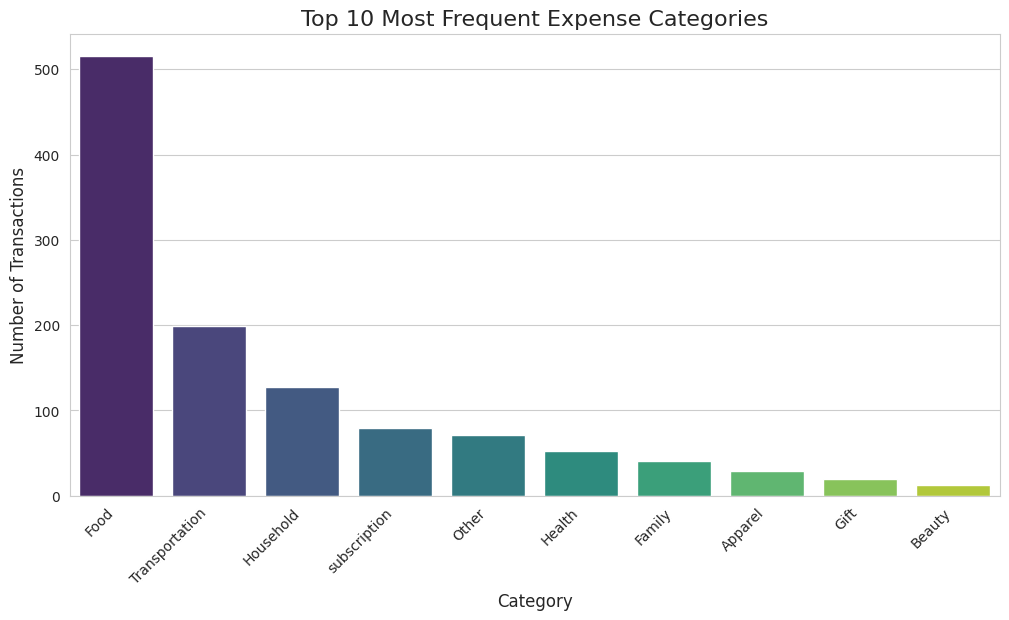

In [10]:
# Plot 1: Top 10 Expense Categories
plt.figure()
top_10_categories = df_expense['Category'].value_counts().nlargest(10)
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')
plt.title('Top 10 Most Frequent Expense Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# **Payment Mode Distribution**

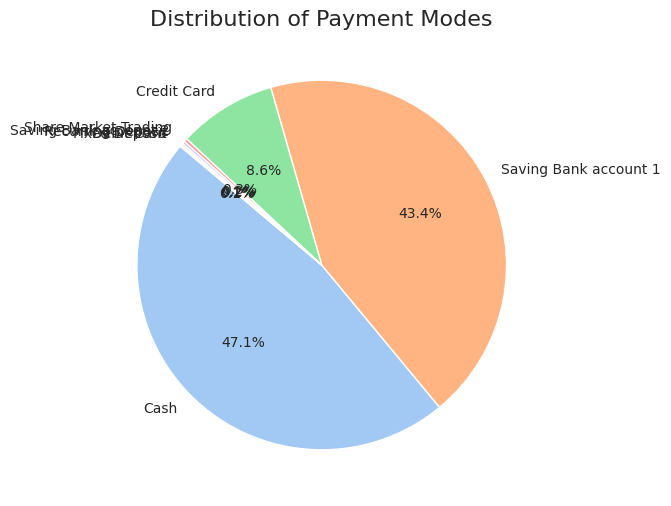

In [11]:
# Plot 2: Payment Mode Distribution
plt.figure()
mode_counts = df['Mode'].value_counts()
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Payment Modes', fontsize=16)
plt.ylabel('') # Hide the y-label
plt.show()


# **Total Expenses Over Time (Monthly)**

/tmp/ipython-input-3550879198.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expenses = df_expense['Amount'].resample('M').sum()


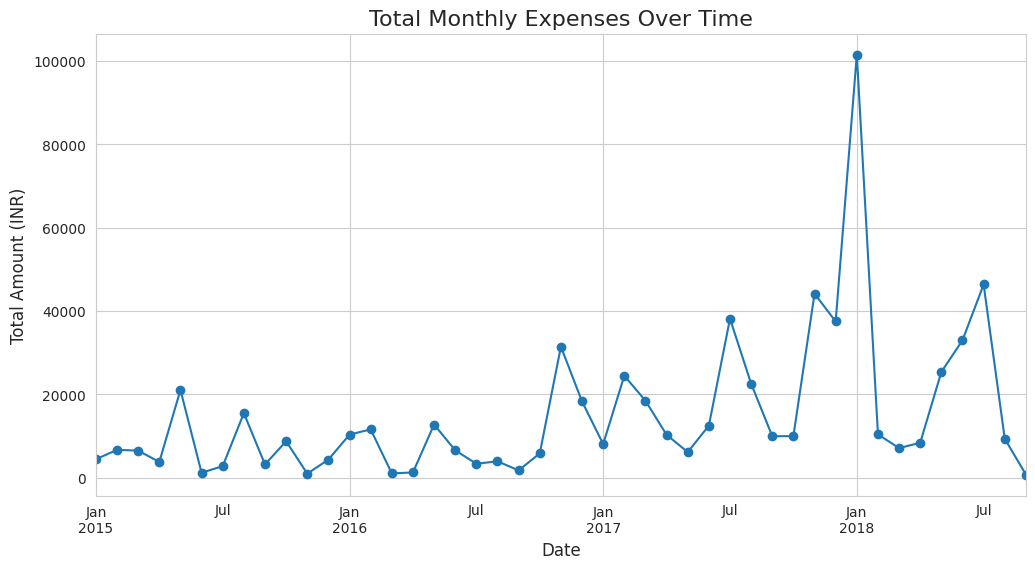

In [12]:
# Plot 3: Total Expenses Over Time (Monthly)
# Set 'Date' as the index for time-series resampling
df_expense.set_index('Date', inplace=True)
# Resample the data by month and sum the amounts
monthly_expenses = df_expense['Amount'].resample('M').sum()

plt.figure()
monthly_expenses.plot(kind='line', marker='o', linestyle='-')
plt.title('Total Monthly Expenses Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Amount (INR)', fontsize=12)
plt.grid(True)
plt.show()

# **Income vs. Expense Count**

/tmp/ipython-input-2924045420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Income/Expense', palette='coolwarm')


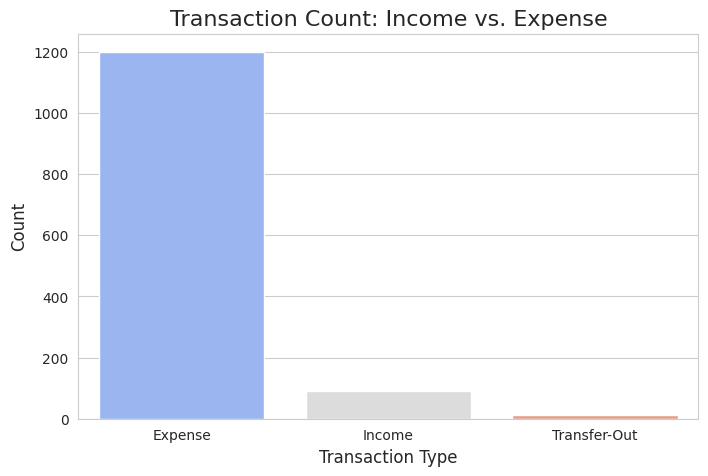


--- Analysis Complete ---


In [13]:
# Plot 4: Income vs. Expense Count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Income/Expense', palette='coolwarm')
plt.title('Transaction Count: Income vs. Expense', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

print("\n--- Analysis Complete ---")
